# Machine Learning Test on DREaM Corpora

This notebook is going to be a training ground for my machine learning skills (skillz?) and a testing ground for how to best handle travel writing. The current corpus is drawn from DREaM.

I have two corpuses hand-built (terminology?) by me. Both are limited by the years 1650-1700. 

The first, which we'll call "travel", consists of 78 texts that are focused on physical travel, primarily outside Britain but some within. I excluded any texts regarding metaphysical travel (a lot of early modernists used the metaphor of travel to talk about going to God) and where travel was a subset of a larger text. 

The second, which we'll call "nontravel", consists of 78 texts that are distinctly not travel. These consist of texts from disciplines like law, philosophy, natural science, scandalous tales, parliament decrees, and sermons.

In both of these corpora, I tried to not include any texts that seemed to fall into a "grey zone," so to speak. Therefore, I didn't include geography in either category. Similarly, I was unsure of where to put Pilgrim's Progress. I am very interested to see what happens with these texts - where will they be classified, in the end?

As a basis, I am drawing largely from the [Classifying Philosophical Texts](https://github.com/htrc/ACS-TT/blob/master/tools/notebooks/ClassifyingPhilosophicalText.ipynb) notebook. 

So, let's experiment, shall we?

First, as noted in the CPT notebook, it's useful to take a look at what are documents look like. For this example, we'll look at document similarly using relative frequencies. The code below produces two visualizations for document similarity: 
- a dendrogram that shows a cluster hierarchy of documents
- a colour-coded scatterplot that shows the multidimensional term frequencies matrix in a 2D space (suggesting clusters)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram
%matplotlib inline

# plot the documents from the corpus
def plot_corpus_similarity(corpus, vectorizer):
    
    # generate the vector, distances and positions
    texts = [corpus.raw(fileid) for fileid in corpus.fileids()]
    documentTermMatrix = vectorizer.fit_transform(texts)
    distances = 1 - cosine_similarity(documentTermMatrix)
    mds = MDS(dissimilarity="precomputed", random_state=1)
    positions = mds.fit_transform(distances)
    
    # plot dendrogram
    linkage_matrix = ward(distances)
    plt.figure(figsize=(8,10))
    dendrogram(linkage_matrix, labels=corpus.fileids(), orientation="right");
    plt.show()  # fixes margins
    
    # plot scatter
    xvalues = positions[:, 0] 
    yvalues = positions[: ,1] 
    plt.figure(figsize=(20,10))
    for x, y, name in zip(xvalues, yvalues, corpus.fileids()):
        plt.scatter(x, y)
        # the colour-coding here is a bit of a hard-coded hack for what is otherwise mostly reusable code
        plt.text(x, y, name.replace(".txt", "")[:25], color='red' if 'Other' in name else 'green')
    plt.show()

In [24]:
import nltk
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

data_dir = "C:/Users/broomgrass/iPython/Dream/data/texts"
corpus = PlaintextCorpusReader(data_dir+"/testcorpus", ".*\.txt") 
# the testcorpus folder has the travel and nontravel texts together, with Other in the filename designating nontravel

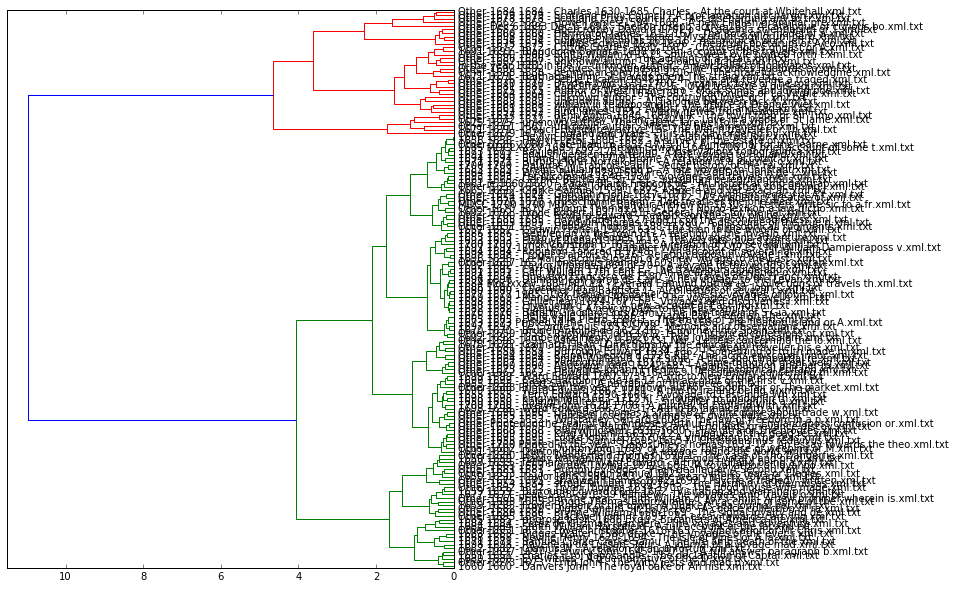

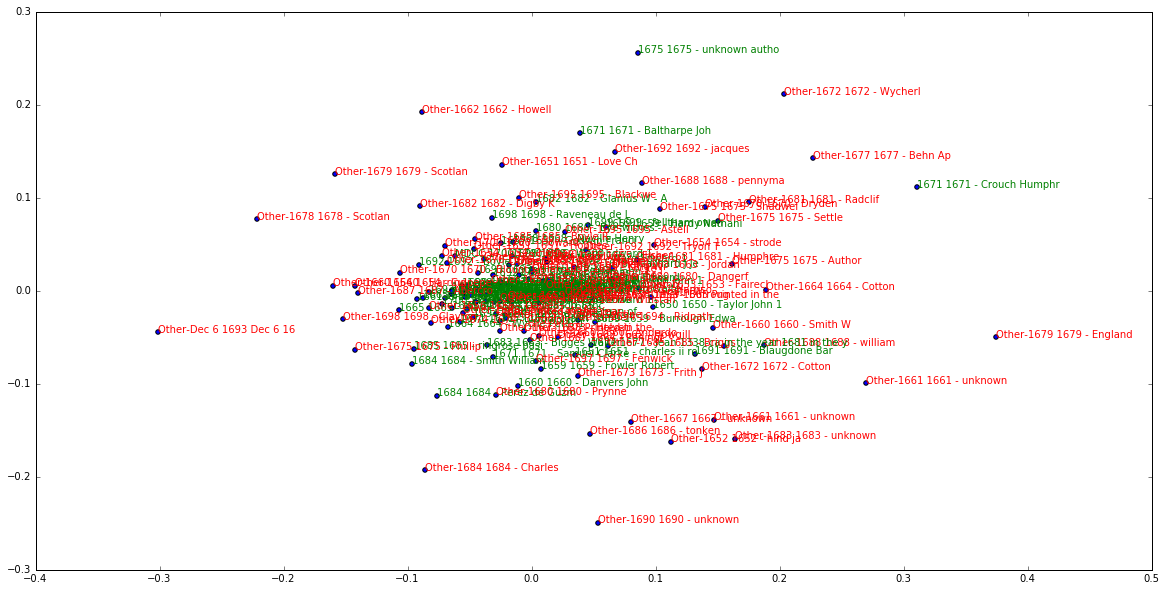

In [25]:
simple_vectorizer = TfidfVectorizer(use_idf=False)
plot_corpus_similarity(corpus, simple_vectorizer)

Well, it worked! From the bottom graph, it looks like the travel are more densely connected than the nontravel, which is what I expected. The outliers for travel is a 1675 ballad about the Quaker's voyage to North America, Baltharpe's 1671 poem *THE Straights Voyage, OR, St. Dadids Poem: BEING A DESCRIPTION OF The most Remarkable Passages that happened in her first Expedition against the Turkes of Argeir* and Humphrey's 1671 poem *The Welch Traveller: OR, The Unfortunate WELCHMAN*. Upon a closer review, the latter is more of a humourous/satiric poem about the Welsh, so if I was to refine my corpus, I might remove it. I'm interested that these outliers are all poems/lyrical in some fashion - I'm not sure if others in the corpus are poetic as well, but I do recall reading that most 18thC travel literature was in prose, so I wouldn't be surprised for the pattern to be the same in the early modern.

The texts in the dendrogram are grouped or split up (I wish I could read them more clearly!). And in the scatterplot, there is a great deal of overlap. It's more than I expected, but I'm interested to see if stopwords will help.

Well, continuing onward, let's refine using English stopwords – this will remove common function words from the relative term frequencies matrix. We'll also limit the number of terms considered to 5,000 for further efficiency.

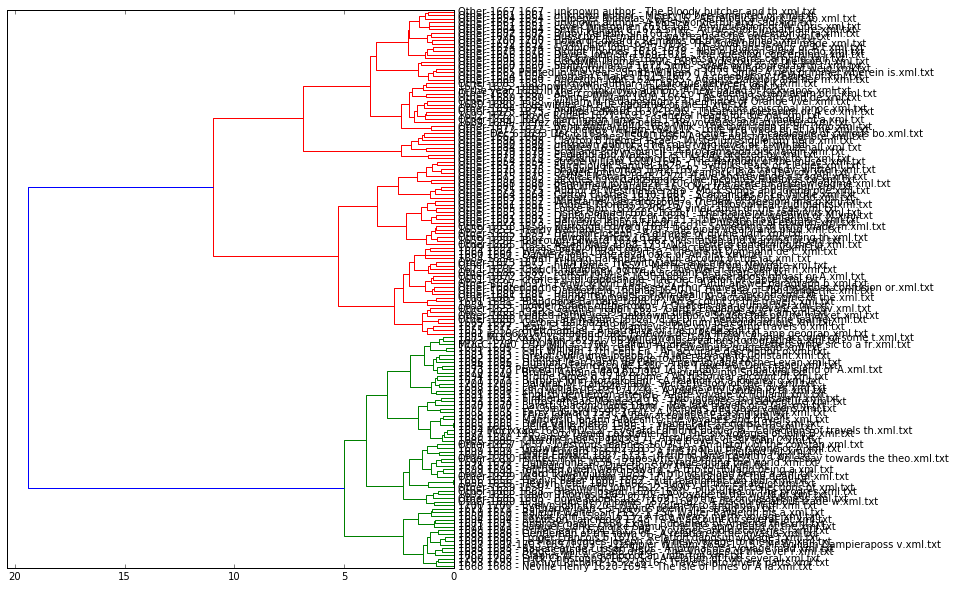

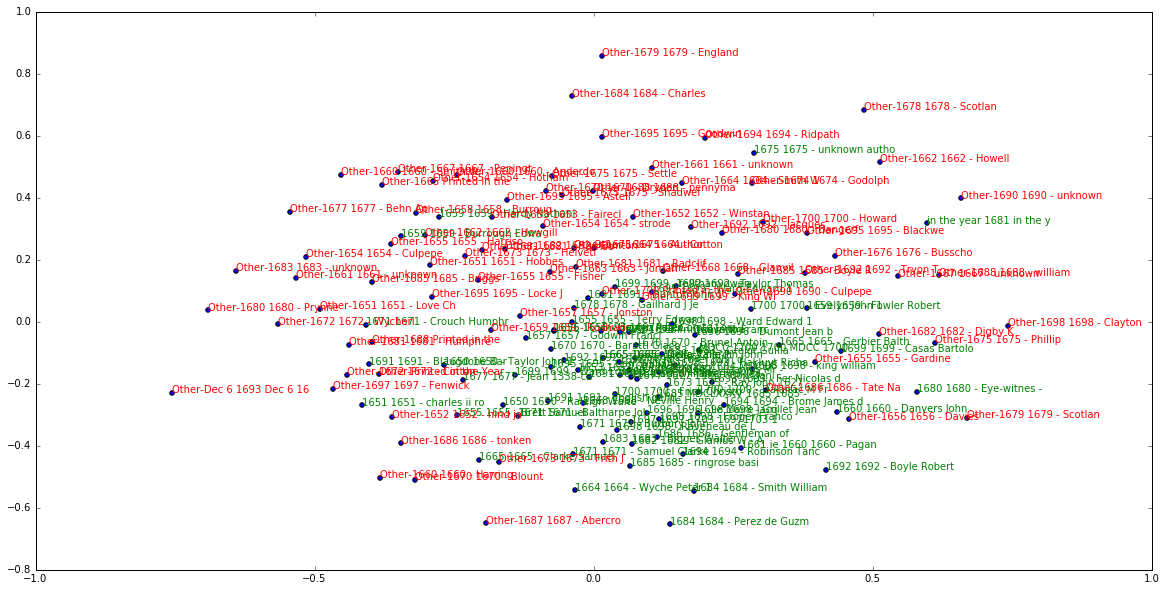

In [26]:
stoplist_vectorizer = TfidfVectorizer(use_idf=False, stop_words=nltk.corpus.stopwords.words("english"), max_features=5000)
plot_corpus_similarity(corpus, stoplist_vectorizer)

Ah, this certainly looks more fine-tuned, with travel looking like a locus. There are still a few outliers - for example, the  "in the year 1681" is another ballad, *A NEW BALLAD OF Jocky's Iourney into England, in the Year, 1681.* I'm not sure whether it is better to cull some of the outliers - the 1659 Hardy Nathanial text, for example, is *THE PIOUS VOTARY AND PRUDENT TRAVELLER: CHARACTERIZED In a Farewell-SERMON, occasioned by the voyage of Nathanael Wych Esq. President to the East-Indies.* Do I want to define it as travel literature, or not? 

Additionally, something else to watch for in the future is what variable to use for "red", since certain texts could have "other" in the title.
   

In the CPT notebook, they run the same process with a keyword list. I'd be interested to see how that works on the corpus, but I don't have a keyword list prepared - dang! Easiest way to populate one might be to run over the travel corpus looking for word frequencies and maybe topics?

Until then, let's reflect on this process:

### observations and questions following document similarity

- how important is it to have a really concise corpus? That is, is it better to trim outliers like in the examples above?
- is it too much to include poetry, prose, and plays? Or will focusing on one genre lead to better results? It's limiting my focus a bit, but that has both bad and good aspects.